<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento
`Fecha de entrega: Noviembre 21, 2020 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

Leonardo Rubio Salcedo

In [58]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:/Users/ASUS/Downloads/export_dataframe_twiter.csv")
data.head()

,tweet,date,id,link,Pelicula
0,@KendraWrites Not even going toward the murder...,2020-11-14 18:27:25,1327679544510263296,https://twitter.com/i/web/status/1327679544510...,From the Land of the Moon
1,"@mxrlxn361 @kokofnbr Aso ups also the i Land, ...",2020-11-13 23:55:22,1327399690044891140,https://twitter.com/i/web/status/1327399690044...,From the Land of the Moon
2,14 November 1969. 16.22.00 UTC/GMT. Launch of ...,2020-11-13 23:34:00,1327394310820655105,https://twitter.com/i/web/status/1327394310820...,From the Land of the Moon
3,Loved walking by a part of the Land of Make Be...,2020-11-13 21:59:52,1327370622733791232,https://twitter.com/i/web/status/1327370622733...,From the Land of the Moon
4,@CryptoRudolphus @100trillionUSD @spunzamboni ...,2020-11-13 15:28:44,1327272190786621447,https://twitter.com/i/web/status/1327272190786...,From the Land of the Moon


###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [7]:
import re
 
pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'
 
def text_clean(row):
    text = row['tweet']

    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")

    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")

    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")

    return text, links, hashtags, mentions

In [8]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')

In [10]:
data.head()

,tweet,date,id,link,Pelicula,clean,links,hashtags,mentions
0,@KendraWrites Not even going toward the murder...,2020-11-14 18:27:25,1327679544510263296,https://twitter.com/i/web/status/1327679544510...,From the Land of the Moon,Not even going toward the murders in Oklahoma...,[],[],[@KendraWrites]
1,"@mxrlxn361 @kokofnbr Aso ups also the i Land, ...",2020-11-13 23:55:22,1327399690044891140,https://twitter.com/i/web/status/1327399690044...,From the Land of the Moon,"Aso ups also the i Land, Dark, Pose, a Fall ...",[],[],"[@mxrlxn361, @kokofnbr]"
2,14 November 1969. 16.22.00 UTC/GMT. Launch of ...,2020-11-13 23:34:00,1327394310820655105,https://twitter.com/i/web/status/1327394310820...,From the Land of the Moon,14 November 1969. 16.22.00 UTC/GMT. Launch of ...,[https://t.co/XX4i5xbChZ],[],[]
3,Loved walking by a part of the Land of Make Be...,2020-11-13 21:59:52,1327370622733791232,https://twitter.com/i/web/status/1327370622733...,From the Land of the Moon,Loved walking by a part of the Land of Make Be...,[https://t.co/h4X71OoYip],"[#HappyWorldKindnessDay, #WearAMask]",[]
4,@CryptoRudolphus @100trillionUSD @spunzamboni ...,2020-11-13 15:28:44,1327272190786621447,https://twitter.com/i/web/status/1327272190786...,From the Land of the Moon,I don’t see how that holds true. The probl...,[],[],"[@CryptoRudolphus, @100trillionUSD, @spunzambo..."


In [21]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(data['clean'][0])

data['neg'] = data['clean'].apply(lambda valor: vader.polarity_scores(valor)['neg'])
data['neu'] = data['clean'].apply(lambda valor: vader.polarity_scores(valor)['neu'])
data['pos'] = data['clean'].apply(lambda valor: vader.polarity_scores(valor)['pos'])
data['compound'] = data['clean'].apply(lambda valor: vader.polarity_scores(valor)['compound'])

data.head()

,tweet,date,id,link,Pelicula,clean,links,hashtags,mentions,neg,neu,pos,compound
0,@KendraWrites Not even going toward the murder...,2020-11-14 18:27:25,1327679544510263296,https://twitter.com/i/web/status/1327679544510...,From the Land of the Moon,Not even going toward the murders in Oklahoma...,[],[],[@KendraWrites],0.365,0.635,0.000,-0.9100
1,"@mxrlxn361 @kokofnbr Aso ups also the i Land, ...",2020-11-13 23:55:22,1327399690044891140,https://twitter.com/i/web/status/1327399690044...,From the Land of the Moon,"Aso ups also the i Land, Dark, Pose, a Fall ...",[],[],"[@mxrlxn361, @kokofnbr]",0.184,0.746,0.070,-0.6808
2,14 November 1969. 16.22.00 UTC/GMT. Launch of ...,2020-11-13 23:34:00,1327394310820655105,https://twitter.com/i/web/status/1327394310820...,From the Land of the Moon,14 November 1969. 16.22.00 UTC/GMT. Launch of ...,[https://t.co/XX4i5xbChZ],[],[],0.120,0.880,0.000,-0.6486
3,Loved walking by a part of the Land of Make Be...,2020-11-13 21:59:52,1327370622733791232,https://twitter.com/i/web/status/1327370622733...,From the Land of the Moon,Loved walking by a part of the Land of Make Be...,[https://t.co/h4X71OoYip],"[#HappyWorldKindnessDay, #WearAMask]",[],0.000,0.800,0.200,0.8942
4,@CryptoRudolphus @100trillionUSD @spunzamboni ...,2020-11-13 15:28:44,1327272190786621447,https://twitter.com/i/web/status/1327272190786...,From the Land of the Moon,I don’t see how that holds true. The probl...,[],[],"[@CryptoRudolphus, @100trillionUSD, @spunzambo...",0.129,0.824,0.047,-0.5994


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

9 tuits tienen 1 en positivo el cual es el valor maximo 

In [36]:
data_pos=data[[ 'clean','pos']].sort_values('pos',ascending=False)
data_pos.head(10)
#data_pos['clean'][14210]

,clean,pos
14210,entitled\n,1.000
5735,nice,1.000
18903,Awesome,1.000
15484,Beautiful,1.000
10730,good,1.000
16692,CONGRATULATIONS!!!,1.000
17829,true,1.000
3687,Perfect.,1.000
12779,Congratulations,1.000
3199,Thank you 💗,0.894


6 tuits tienen 1 en positivo el cual es el valor maximo 

In [37]:
data_pos=data[['clean','neg']].sort_values('neg',ascending=False)
data_pos.head(10)

,clean,neg
16787,Stressed,1.000
14224,leave\n,1.000
14206,broken\n,1.000
11043,sabotage,1.000
11065,sabotage,1.000
2646,death penalty,1.000
16807,Snitch ass niggas,0.855
4757,Suicide Squad,0.818
4739,Suicide Squad,0.818
4735,Suicide Squad,0.818


Positivo por componente

In [40]:
data_pos=data[['clean','compound']].sort_values('compound',ascending=False)
data_pos.head(2)

,clean,compound
12187,"\n[ LMAO big heart eyes for Sols , yes ~ ]\n\...",0.9994
852,GOOD AFTERNOON YOU ALL! TODAY HAS SO MANY MIRA...,0.9933


In [42]:
data_pos['clean'][12187]

' \n[ LMAO big heart eyes for Sols , yes ~ ]\n\nVA;🖤🖤🖤🖤🖤🖤🖤🖤🖤🖤\nFL; 🖤🖤🖤🖤🖤🖤🖤🖤🖤🖤\nSD;🖤🖤🖤🖤🖤🖤🖤🖤🖤🖤🖤\nRI; 🖤'

In [44]:
data_pos=data[['clean','compound']].sort_values('compound',ascending=True)
data_pos.head(2)

,clean,compound
19393,Mashallah 😭😭😭🧿🧿🧿\nLike my heart is swelling pl...,-0.9954
6703,"People speak sometimes about the ""bestial"" cru...",-0.9919


In [45]:
data_pos['clean'][19393]

'Mashallah 😭😭😭🧿🧿🧿\nLike my heart is swelling pls😭😭😭😭😭😭😭🧿🧿🧿🧿\nThey already treat her like a Queen 😭😭😭😭😭\n\nKitna pyaar dete honge usko😭😭😭😭😭😭😭😭 '

###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [63]:
def desc_sentimiento(row):
    numero = row['compound']
    if(numero>=0.4):
        descipcion="Positivo"
    elif(numero>=-0.6):
        descipcion="Neutro"
    else:
        descipcion="Negativo"
    return descipcion

In [64]:
data['sentimiento'] = data.apply(desc_sentimiento, axis=1, result_type='expand')

In [65]:
data.groupby(['sentimiento'], as_index = False)[['tweet']].count()

,sentimiento,tweet
0,Negativo,2356
1,Neutro,9988
2,Positivo,7216


###  `[BONUS 5pts]` : Diagrama de barras de la pregunta 3


No handles with labels found to put in legend.


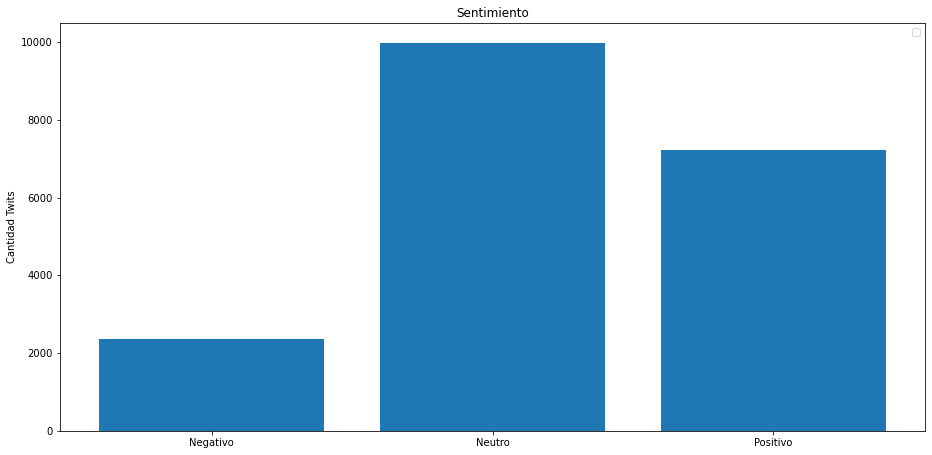

In [66]:
agrupacion_pais =data.groupby(['sentimiento'], as_index = False)[['tweet']].count()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["sentimiento"]
men_means =agrupacion_pais["tweet"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width)
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad Twits')
ax.set_title('Sentimiento')
ax.legend()
plt.show()

###  `[BONUS 7pts]` : Nubes de palabras por sentimiento

In [79]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

def generar_grafico(datos,imagen):
    calabaza = PIL.Image.open(imagen)
    mask = np.array(calabaza)
    palabras = datos.clean.str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400,
                         max_font_size=150, max_words=500,
                         background_color='black', 
                         colormap='copper_r',
                         stopwords=stopwords,
                         mask=mask, contour_width=0.5, contour_color='white').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                         #title= "Ejemplo"
    wordcloud.to_file(imagen)

    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title="Ejemplo"
    return plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

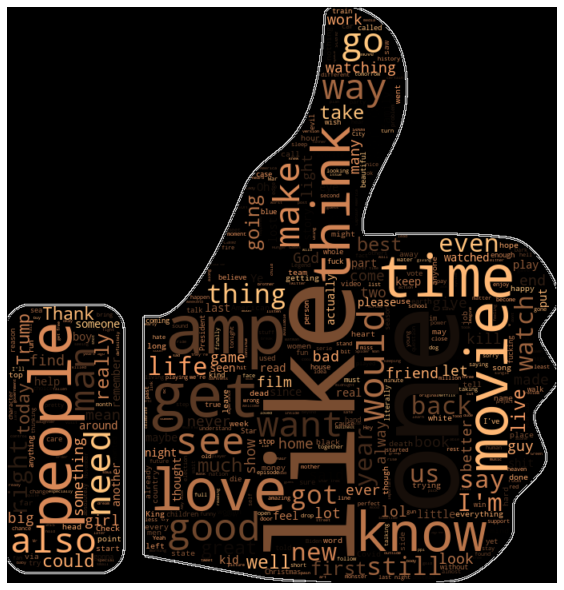

In [89]:
data_positivo=data[data['sentimiento']=="Positivo"]
generar_grafico(data,"positivo2.png")

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

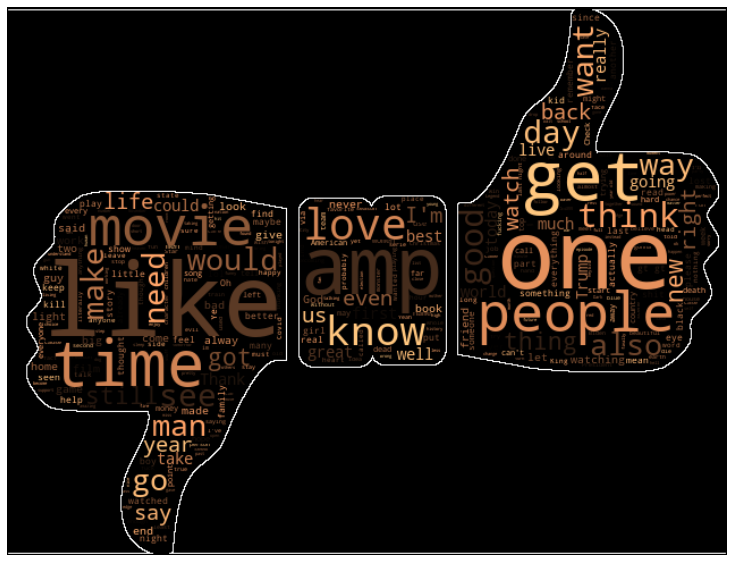

In [94]:
data_positivo=data[data['sentimiento']=="Neutro"]
generar_grafico(data,"neutro.png")

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

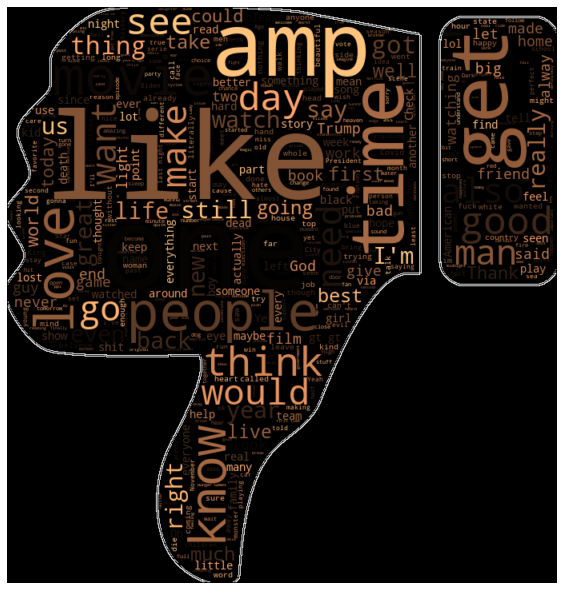

In [93]:
data_positivo=data[data['sentimiento']=="Negativo"]
generar_grafico(data,"negativo.png")